In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


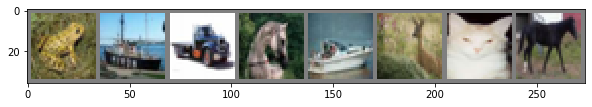

      frog     ship    truck    horse     ship     deer      cat    horse


In [4]:
batch_size = 64
subset_size = 1000
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
#net = models.vgg16(pretrained=True)

#testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam', num_epochs=50, log_every=10, plot=True)

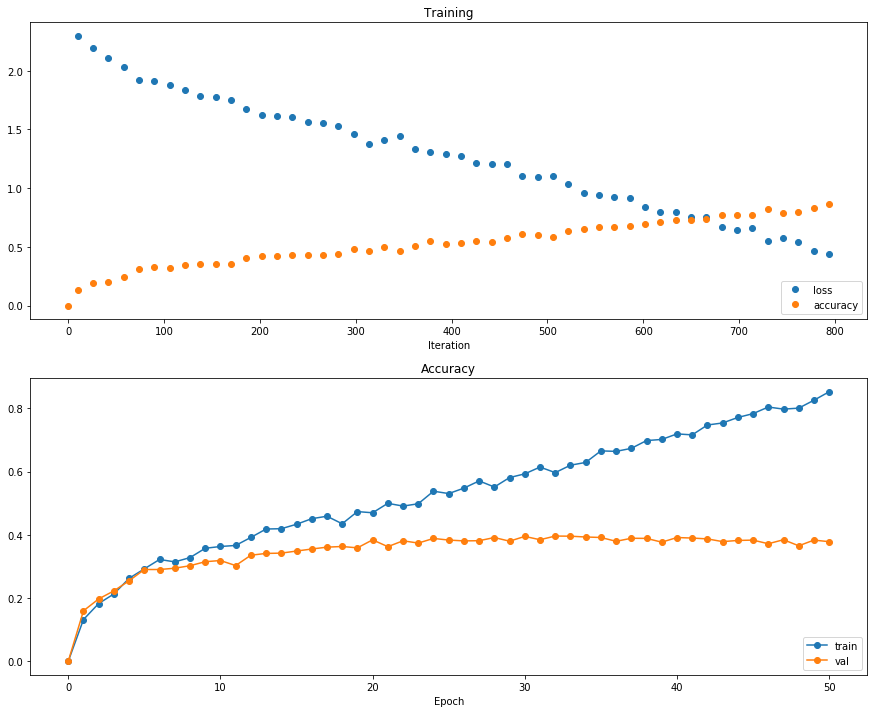

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,        10]    2.29698067 |        0.12812500
----------------------------------------------------
[    1,  finished]     accuracy: |        0.15970000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,        10]    2.19208014 |        0.19218750
----------------------------------------------------
[    2,  finished]     accuracy: |        0.19730000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    3,        10]    2.11071346 |        0.20000000
----------------------------------------------------
[    3,  finished]     accuracy: |        0.22280000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    4,        10]    2.03566970 |        0.24062500
-------------------------------------------

In [6]:
solver.train()

In [7]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

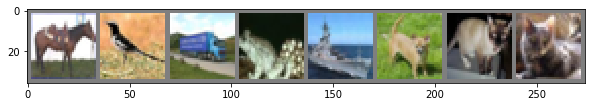

      Real:    horse     bird    truck     frog     ship      dog      cat      cat
 Predicted:    horse     bird    truck     frog     ship     frog      cat      cat


In [8]:
solver.predict_samples(classes)

In [9]:
solver.print_class_accuracies(classes)

Accuracy of plane : 33 %
Accuracy of   car : 47 %
Accuracy of  bird : 24 %
Accuracy of   cat : 33 %
Accuracy of  deer : 27 %
Accuracy of   dog : 23 %
Accuracy of  frog : 57 %
Accuracy of horse : 33 %
Accuracy of  ship : 59 %
Accuracy of truck : 39 %


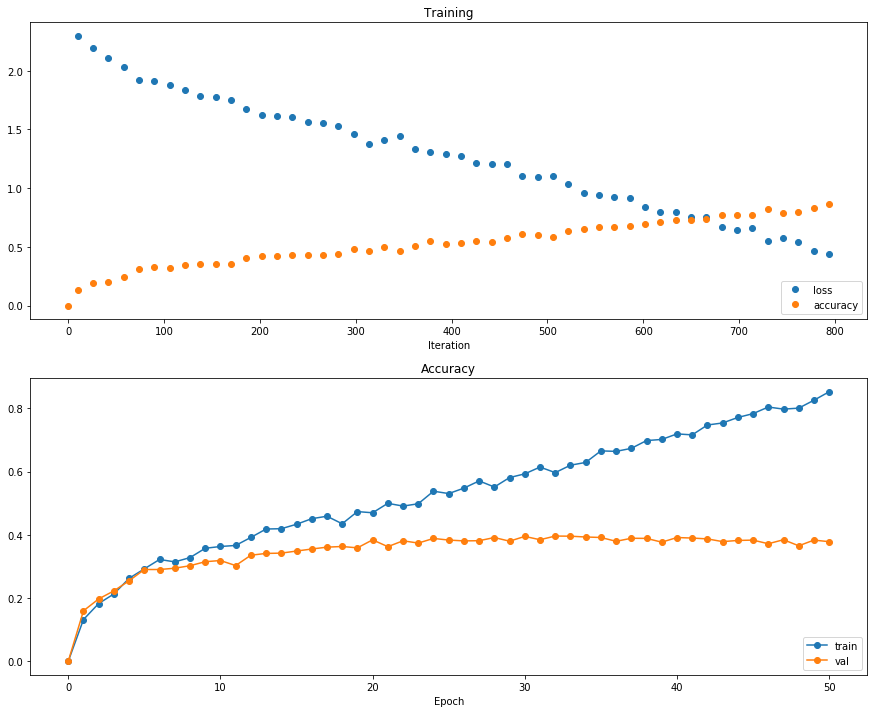

In [10]:
solver.print_plots()